In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("1_npk-temp-ph-crop.csv")

In [3]:
df2=pd.read_csv("npk-ph-temp-humidty.csv")

In [4]:
df1.head()

,Nitrogen,Phosphorus,Potassium,Temperature,pH_Value,Crop,Soil_Type,Variety,Humidity,Rainfall
0,69.074766,53.954402,88.067625,17.261834,4.631301,Wheat,Clay,Soft Red,72.941652,302.842639
1,107.329352,70.102134,32.081067,21.846116,4.761658,Tomato,Clay,Beefsteak,99.361954,94.693847
2,130.634624,67.204533,28.294252,33.246895,6.566007,Sugarcane,Clay,Co 86032,81.506836,83.563685
3,15.169301,87.493181,14.336679,14.396289,6.296297,Sugarcane,Silt,Co 0238,59.274465,31.508836
4,21.881965,89.269712,38.833885,16.773218,8.268274,Maize,Sandy,Sweet,51.191584,295.193482


In [5]:
df2.head()

,N,P,K,temperature,ph,label,rainfall,humidity
0,90,42,43,20.879744,6.502985,rice,202.935536,82.002744
1,85,58,41,21.770462,7.038096,rice,226.655537,80.319644
2,60,55,44,23.004459,7.840207,rice,263.964248,82.320763
3,74,35,40,26.491096,6.980401,rice,242.864034,80.158363
4,78,42,42,20.130175,7.628473,rice,262.717340,81.604873


In [6]:
df1.drop(columns=["Soil_Type",	"Variety", "Crop", "Humidity","Rainfall"], inplace=True)
df2.drop(columns=["label","rainfall","humidity"],inplace = True)

In [7]:
df2.columns=[ "Nitrogen",	"Phosphorus",	"Potassium",	"Temperature", 	"pH_Value"]

In [8]:
df1.head()

,Nitrogen,Phosphorus,Potassium,Temperature,pH_Value
0,69.074766,53.954402,88.067625,17.261834,4.631301
1,107.329352,70.102134,32.081067,21.846116,4.761658
2,130.634624,67.204533,28.294252,33.246895,6.566007
3,15.169301,87.493181,14.336679,14.396289,6.296297
4,21.881965,89.269712,38.833885,16.773218,8.268274


In [9]:
df2.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,pH_Value
2195,107,34,32,26.774637,6.780064
2196,99,15,27,27.417112,6.086922
2197,118,33,30,24.131797,6.362608
2198,117,32,34,26.272418,6.758793
2199,104,18,30,23.603016,6.779833


In [10]:
df=pd.concat([df1,df2])

In [11]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,pH_Value
count,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000
mean,74.574473,48.064838,54.467888,27.241896,6.493485
std,42.153488,25.602790,29.428850,9.649002,1.123733
min,0.000000,5.000000,5.000000,8.825675,3.504752
25%,36.797543,26.375865,30.447832,19.443765,5.573178
50%,74.593815,47.879363,52.000000,26.911752,6.476932
75%,110.100959,68.582633,76.494121,35.156279,7.436695
max,149.998785,145.000000,205.000000,44.997407,9.935091


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     22200 non-null  float64
 1   Phosphorus   22200 non-null  float64
 2   Potassium    22200 non-null  float64
 3   Temperature  22200 non-null  float64
 4   pH_Value     22200 non-null  float64
dtypes: float64(5)
memory usage: 1.0 MB


In [13]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
pH_Value       0
dtype: int64

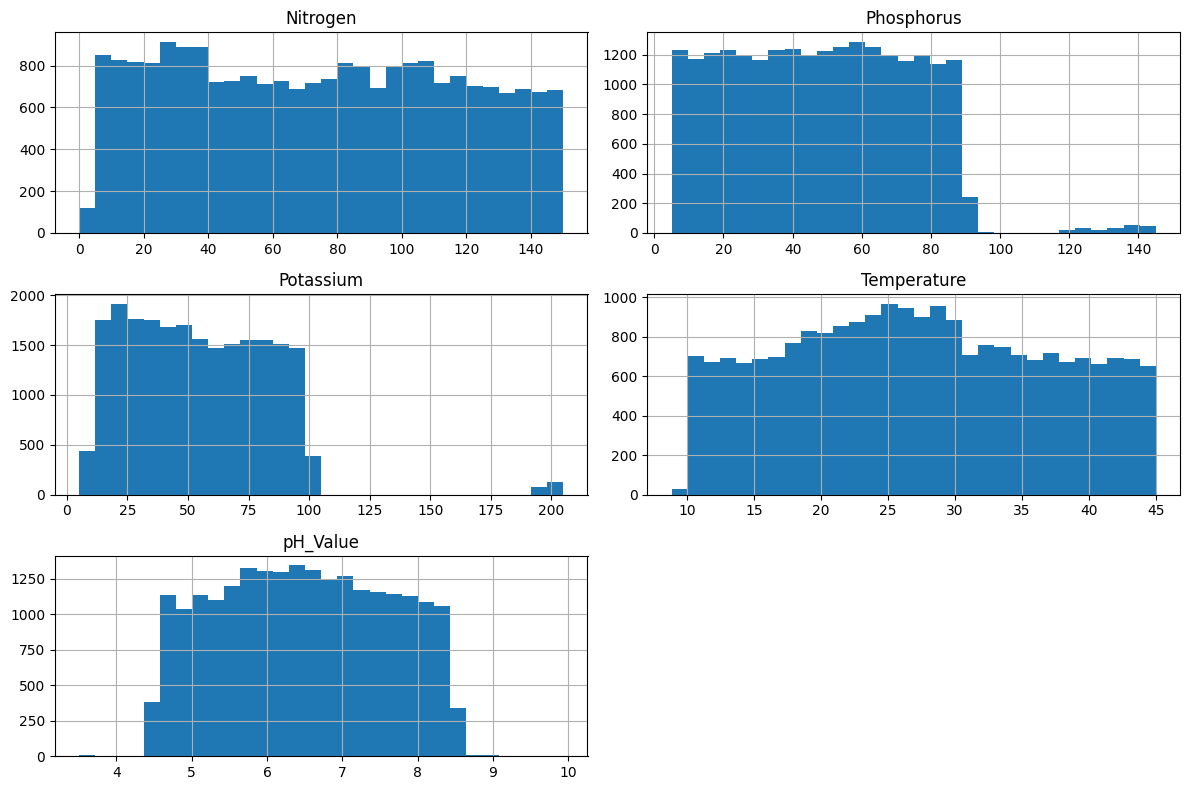

In [14]:
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

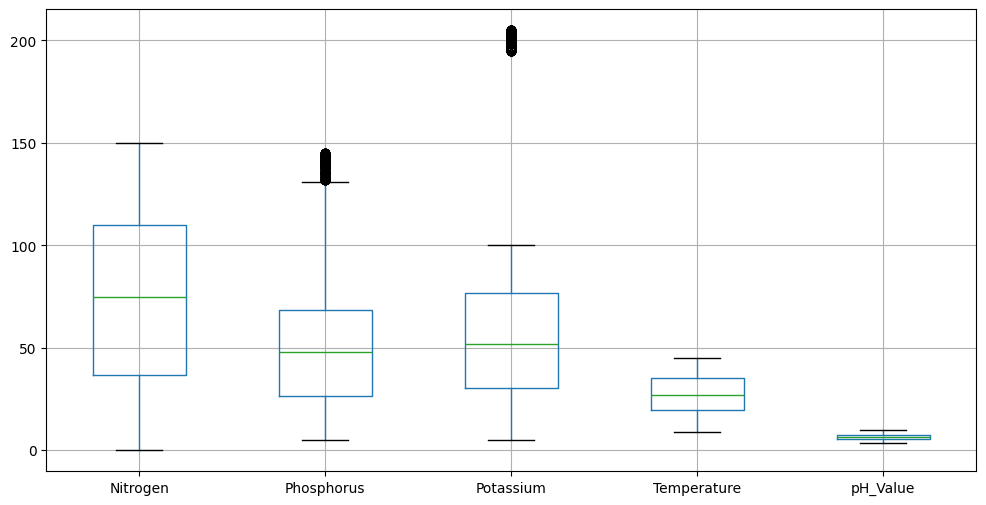

In [15]:
plt.figure(figsize=(12,6))
df.boxplot(column=[ "Nitrogen",	"Phosphorus",	"Potassium",	"Temperature", 	"pH_Value"])
plt.show()

In [ ]:

from sklearn.preprocessing import RobustScaler

In [17]:
features = ['Nitrogen','Phosphorus','Potassium','pH_Value','Temperature']

In [18]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df[features])


In [20]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.03, random_state=42)
iso.fit(X_scaled)

df['anomaly'] = iso.predict(scaler.transform(df[features]))


In [21]:
print(df['anomaly'].value_counts())
print(df[df['anomaly'] == -1].head())


anomaly
 1    21534
-1      666
Name: count, dtype: int64
       Nitrogen  Phosphorus  Potassium  Temperature  pH_Value  anomaly
103    5.143714   67.017608  15.698750    11.225018  4.770355       -1
107   12.015512    9.326616  84.105618    11.916511  8.024168       -1
108  149.608051   71.002627  61.054408    11.485545  8.447720       -1
132  149.869587   34.652603  40.814867    10.059392  7.580807       -1
204  138.270658   86.993602  87.902485    42.394297  7.633532       -1


In [1]:
def explain(row):
    reasons = []

    # threshold checks
    if row['Nitrogen'] < 240 :
        reasons.append("Low quantity of Nitrogen present in soil")
    if row['Nitrogen'] > 480:
        reasons.append("High quantity of Nitrogen present in soil")

    if row['Phosphorus'] < 11 :
        reasons.append("Low quantity of Phosphorus present in soil")
    if row['Phosphorus'] > 22:
        reasons.append("High quantity of Phosphorus present in soil")


    if row['Potassium'] < 110:
        reasons.append("Low quantity of Potassium present in soil")
    if row['Potassium'] < 280:
        reasons.append("High quantity of Potassium present in soil")  

    if row['pH_Value'] < 5.5:
        reasons.append("The soil have high acidic content")
    if row['pH_Value'] < 7.5:
        reasons.append("The soil is highly alkaline in nature")

    if row['Temperature'] < 10 or row['Temperature'] > 24:
        reasons.append("Temperature out of recommended range (10-24°C)")


    if row.get('anomaly', 1) == -1 and len(reasons) == 0:
        reasons.append("Unusual combination of values detected by model")

    return "\n".join(reasons)



In [23]:
import joblib

joblib.dump(iso, "iso_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']